<a href="https://colab.research.google.com/github/3m6d/ML-techniques-practise/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Decision Trees
1.   Decision Tree Regression
2.   Decision Tree Classifier

Decision trees are versatile machine learning models capable of handling both regression and classification tasks.

In [38]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
import pandas as pd


In [40]:
file_path = '/content/drive/MyDrive/loan_dataset.csv'

df1 = pd.read_csv(file_path)

df1.head()

,loan_id,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,bank_asset_value,loan_status
0,1,9600000,29900000,12,778,2400000,8000000,Approved
1,2,4100000,12200000,8,417,2700000,3300000,Rejected
2,3,9100000,29700000,20,506,7100000,12800000,Rejected
3,4,8200000,30700000,8,467,18200000,7900000,Rejected
4,5,9800000,24200000,20,382,12400000,5000000,Rejected


Since the data is in values

In [41]:
x = df1.drop(['loan_id','loan_status'], axis = 1)
y = df1.loan_status

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Decision Tree Classification:

For classification tasks, decision trees assign discrete class labels to observations based on feature values. The DecisionTreeClassifier class in scikit-learn is commonly used for this purpose. Key parameters include criterion (the function to measure the quality of a split, such as 'gini' for Gini impurity or 'entropy' for information gain), splitter (the strategy used to choose the split at each node), and max_depth.

In [43]:
model = DecisionTreeClassifier(max_depth = 3)

how to know what max depth to use

Use cross validation
if max depth is high, there is chance of overfitting

In [44]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

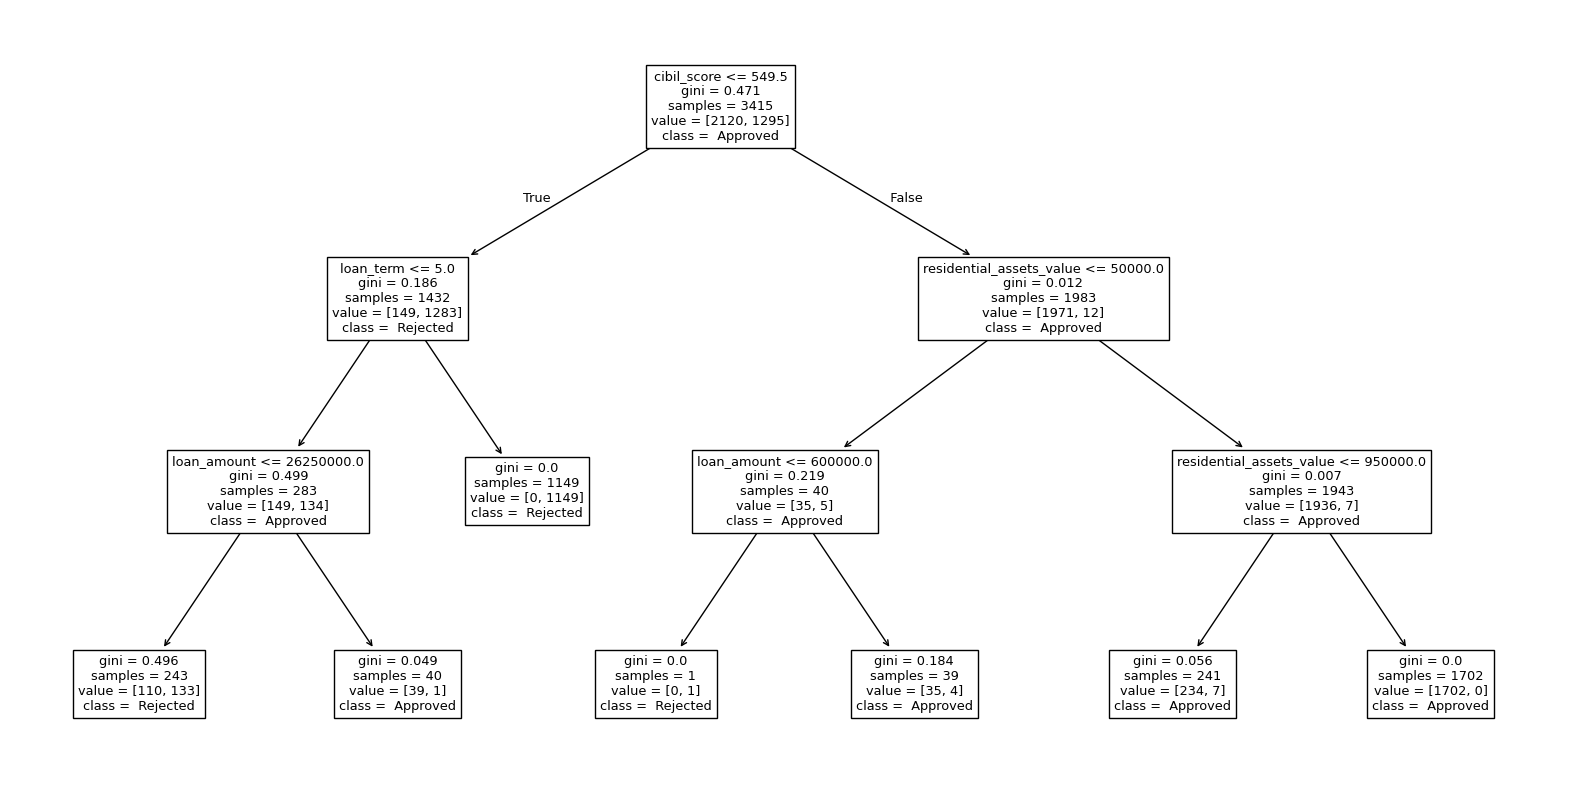

In [45]:
plt.figure(figsize=(20,10))
plot_tree (model, feature_names = x.columns, class_names = model.classes_);

here in the tree, you can see that cibil score is used to further divide and use for key decision, cibil score is understood as important feature after calculation of cross entropy and information gain. it is done by model.

the value of Gini shows the balance of the data. Gini = 0 means it is pure and has one class only.

What is Gini

In decision tree algorithms, particularly for classification tasks, the Gini impurity (or Gini index) is a metric used to evaluate the quality of a split at each node. It quantifies the likelihood of incorrectly classifying a randomly chosen element from the dataset if it were labeled according to the distribution of labels in that subset.

In [46]:
## gives the thing that model need to predict
model.classes_

array([' Approved', ' Rejected'], dtype=object)

##Decision Tree Regressor

In regression, decision trees predict continuous outcomes by learning decision rules from input features. The DecisionTreeRegressor class in scikit-learn facilitates this process. Key parameters include max_depth (the maximum depth of the tree), min_samples_split (the minimum number of samples required to split an internal node), and min_samples_leaf (the minimum number of samples required to be at a leaf node).

In [47]:
file_path = '/content/drive/MyDrive/gold.csv'

df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Demand,Inflation,Interest_Rate,Stock_Index,Gold_Price
0,0,902,2.185094,2.786894,4416,43272.239069
1,1,1148,1.661068,3.631158,3245,56133.914815
2,2,1070,1.062546,4.362615,4199,50713.282427
3,3,906,2.693606,1.966815,4062,43581.276999
4,4,871,2.579526,1.491085,3758,40417.163073


In [50]:
x = df.drop(['Unnamed: 0','Gold_Price'], axis = 1)
y = df.Gold_Price

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
model = DecisionTreeRegressor(max_depth = 3)

In [53]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

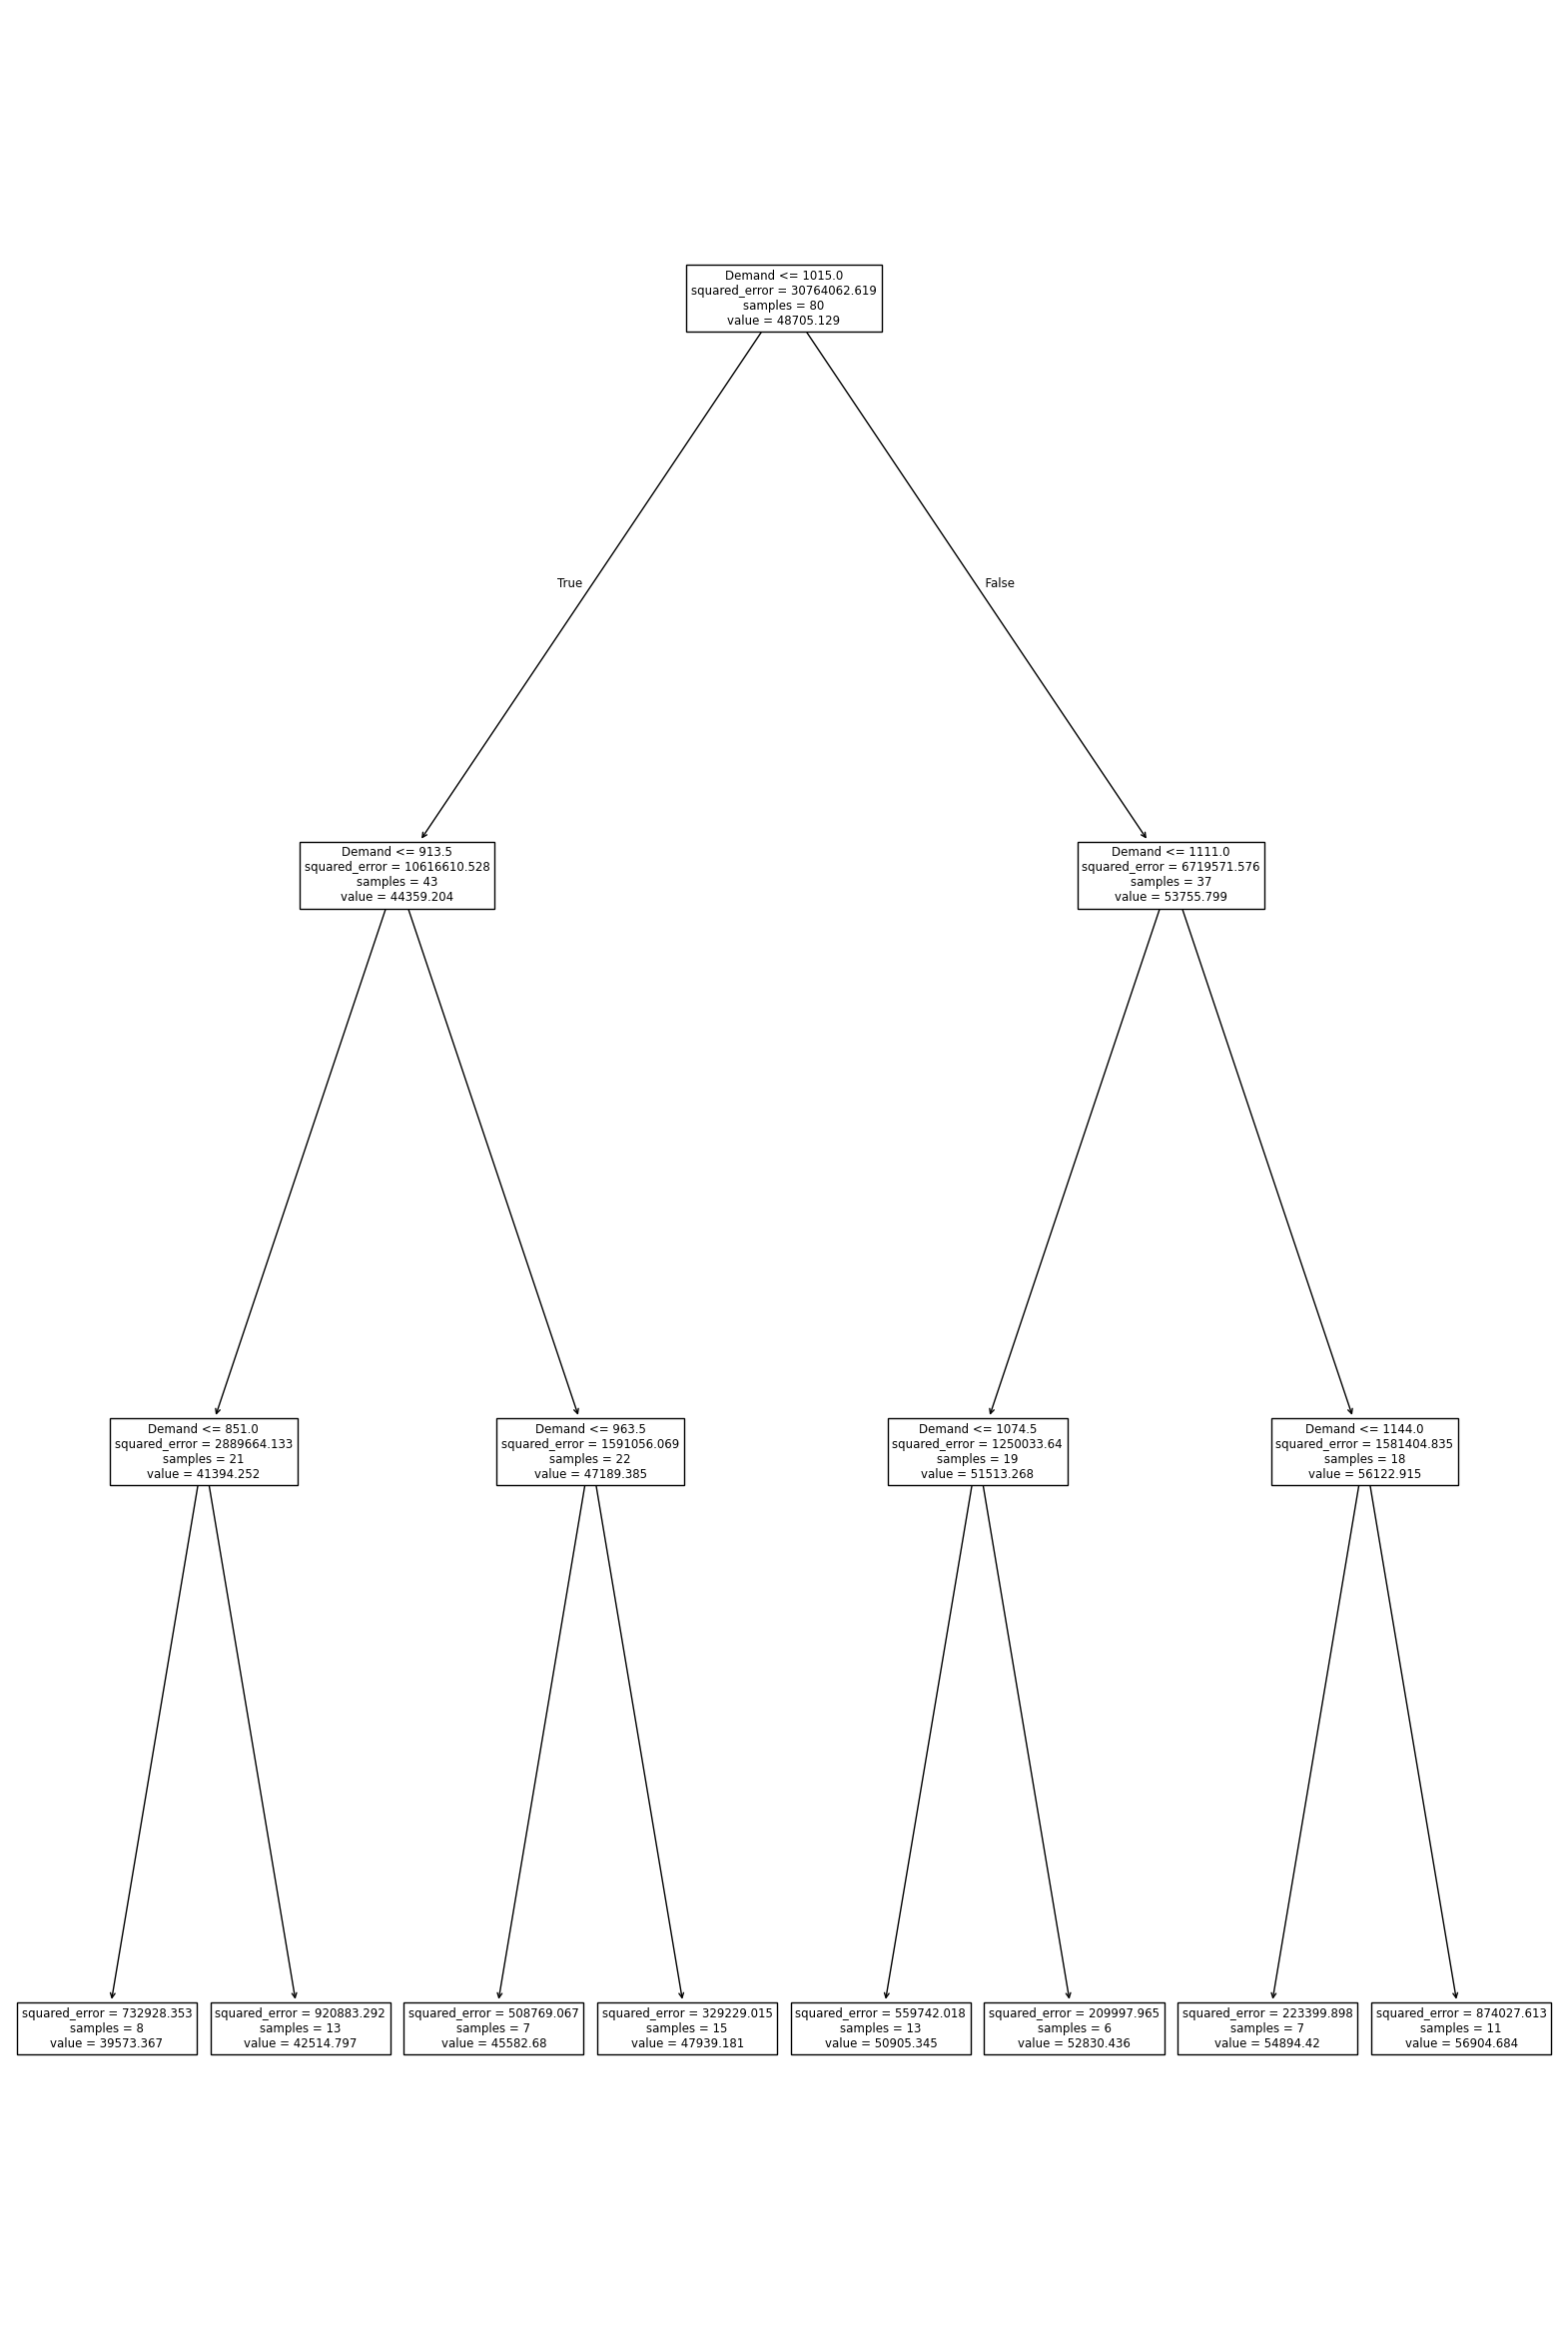

In [57]:
plt.figure(figsize=(20,30))
plot_tree (model, feature_names = x.columns);